In [1]:
!pip install requests beautifulsoup4 pandas


In [2]:


import pandas as pd
from bs4 import BeautifulSoup
import requests


url = 'https://www.screener.in/screens/388737/profitable-companies-of-india/?page=1'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


table = soup.find('table', class_='data-table text-nowrap striped mark-visited')


heading=[]
for th in table.find_all('th'):
  a_tag=th.find('a')
  heading.append(a_tag.text.strip())




In [11]:
headers=heading[13:]

In [4]:
data = []
for tr in table.find_all('tr')[1:]:
    cells = tr.find_all('td')
    row = [cell.get_text(strip=True) for cell in cells]
    data.append(row)

In [34]:
df = pd.DataFrame(data, columns=headers)
df.columns = df.columns.str.replace('\n', '').str.replace(' ', '').str.strip()


df


,S.No.,Name,CMPRs.,P/E,MarCapRs.Cr.,DivYld%,NPQtrRs.Cr.,QtrProfitVar%,SalesQtrRs.Cr.,QtrSalesVar%,ROCE%,Debt/Eq,NPPrevAnnRs.Cr.
0,1.,TCS,4308.70,32.76,1558925.37,1.28,12105.00,8.72,62613.00,5.44,64.28,0.09,42303.00
1,2.,Infosys,1906.75,29.70,791710.59,1.99,6374.00,7.12,39315.00,3.64,39.99,0.10,24108.00
2,3.,Hind. Unilever,2966.25,67.44,696947.51,1.42,2612.00,2.49,15707.00,1.36,27.24,0.03,10143.00
3,4.,ITC,522.70,31.96,653772.18,2.63,5176.99,-0.22,18457.33,7.53,37.47,0.00,19476.72
4,5.,Life Insurance,1024.25,15.51,647837.89,0.98,10527.00,9.27,212082.84,11.53,72.95,0.00,35996.65
5,6.,HCL Technologies,1808.40,29.88,490739.20,2.88,4259.00,20.56,28057.00,6.70,29.60,0.08,14845.00
6,7.,Sun Pharma.Inds.,1948.70,44.34,467558.41,0.69,2860.51,25.05,12652.75,5.96,17.32,0.05,8512.94
7,8.,Maruti Suzuki,13495.60,28.85,424305.14,0.93,3759.70,47.85,35779.40,9.97,21.82,0.00,8263.70
8,9.,O N G C,297.20,8.20,373885.90,4.12,10235.64,-32.15,166576.75,1.68,18.43,0.45,32777.61
9,10.,Bajaj Auto,12666.40,44.18,353718.86,0.63,1941.79,18.10,11932.07,15.71,33.53,0.07,6060.21


In [35]:
duplicates=[df.duplicated()]
print(duplicates)

[0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool]


In [39]:
from google.colab import files

In [40]:
df.to_csv('my_data.csv', index=False)

In [41]:
files.download('my_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
uploaded = files.upload()


Saving my_data (2).csv to my_data (2).csv


In [44]:
df = pd.read_csv('/content/my_data (2).csv')

In [45]:
df.head()


,Name,CMP-Rs,P/E,MarCap-Rs.Cr.,DivYld%,NPQtr-Rs.Cr.,QtrProfitVar-%,SalesQtr-Rs.Cr.,QtrSalesVar-%,ROCE-%,Debt/Eq,NPPrevAnn-Rs.Cr.
0,TCS,4308.70,32.76,1558925.37,1.28,12105.00,8.72,62613.00,5.44,64.28,0.09,42303.00
1,Infosys,1906.75,29.70,791710.59,1.99,6374.00,7.12,39315.00,3.64,39.99,0.10,24108.00
2,Hind. Unilever,2966.25,67.44,696947.51,1.42,2612.00,2.49,15707.00,1.36,27.24,0.03,10143.00
3,ITC,522.70,31.96,653772.18,2.63,5176.99,-0.22,18457.33,7.53,37.47,0.00,19476.72
4,Life Insurance,1024.25,15.51,647837.89,0.98,10527.00,9.27,212082.84,11.53,72.95,0.00,35996.65


In [46]:
pip install matplotlib seaborn


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

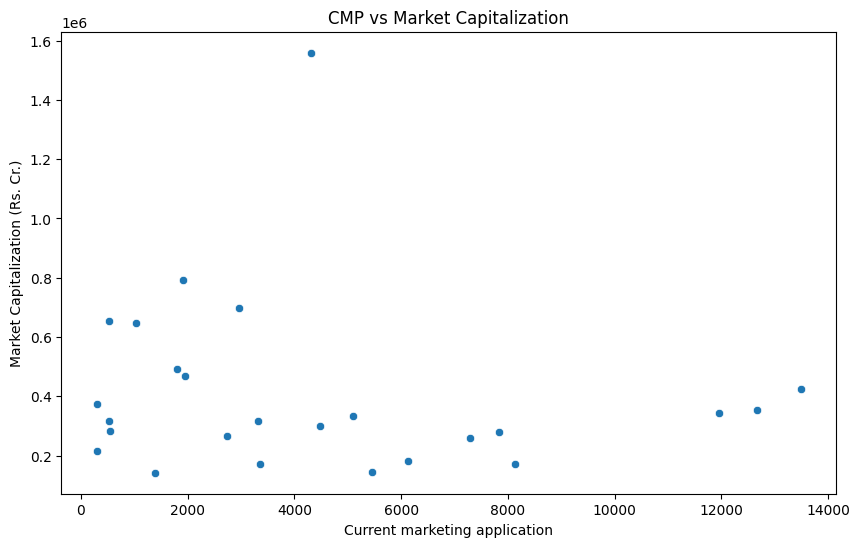

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CMP-Rs', y='MarCap-Rs.Cr.', data=df)
plt.title('CMP vs Market Capitalization')
plt.xlabel('Current marketing application')
plt.ylabel('Market Capitalization (Rs. Cr.)')
plt.show()

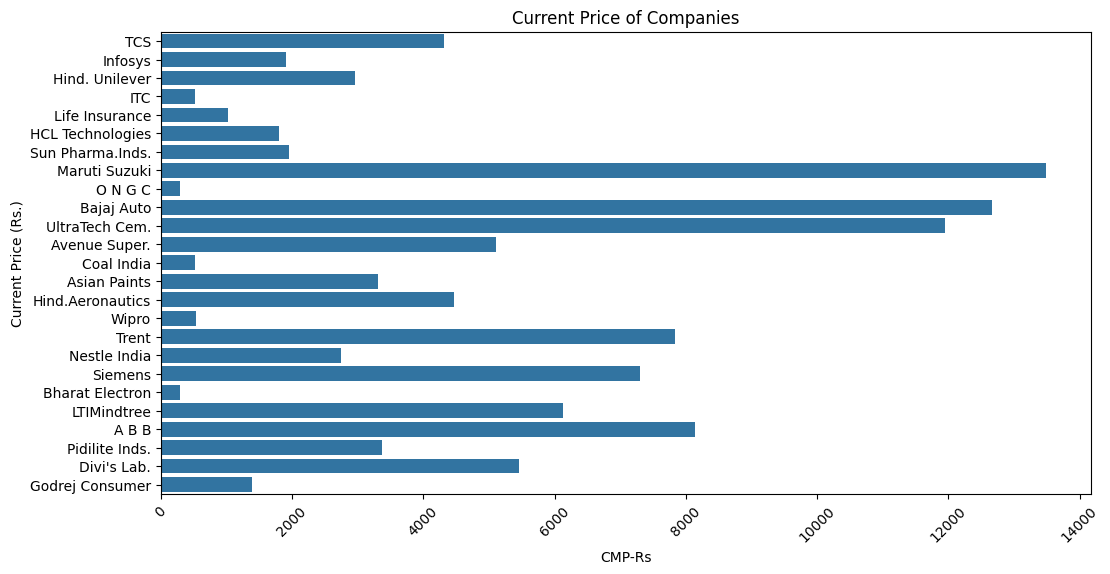

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='CMP-Rs', y='Name')
plt.title('Current Price of Companies')
plt.xticks(rotation=45)
plt.ylabel('Current Price (Rs.)')
plt.show()

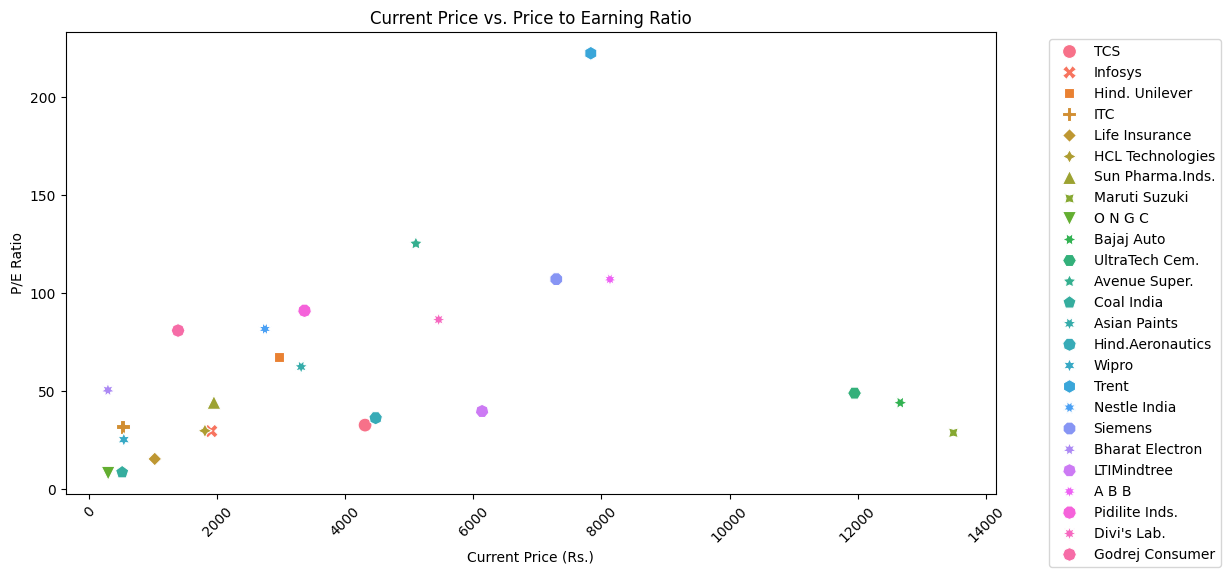

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CMP-Rs', y='P/E', hue='Name', style='Name', s=100)
plt.title('Current Price vs. Price to Earning Ratio')
plt.xlabel('Current Price (Rs.)')
plt.xticks(rotation=45)

plt.ylabel('P/E Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


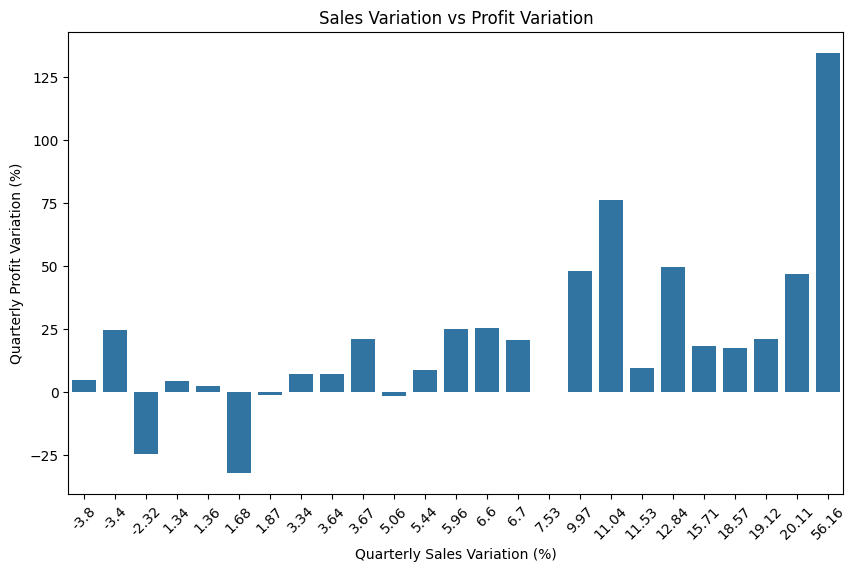

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='QtrSalesVar-%', y='QtrProfitVar-%', data=df)
plt.xticks(rotation=45)

plt.title('Sales Variation vs Profit Variation')
plt.xlabel('Quarterly Sales Variation (%)')
plt.ylabel('Quarterly Profit Variation (%)')

plt.show()

<Figure size 1000x600 with 0 Axes>

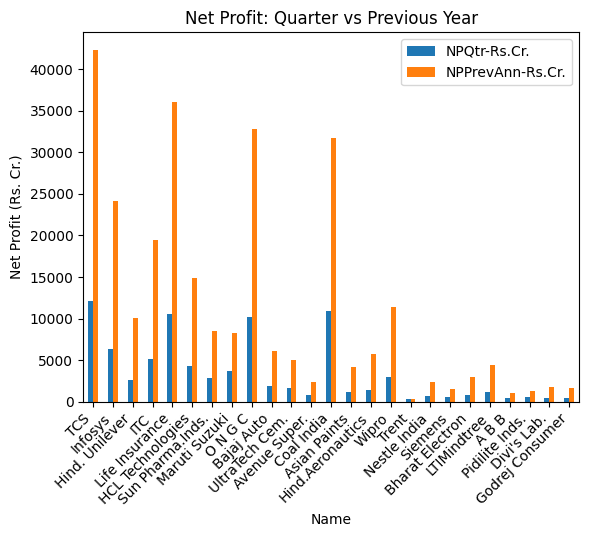

In [59]:
plt.figure(figsize=(10, 6))
df[['Name', 'NPQtr-Rs.Cr.', 'NPPrevAnn-Rs.Cr.']].set_index('Name').plot(kind='bar')
plt.title('Net Profit: Quarter vs Previous Year')
plt.ylabel('Net Profit (Rs. Cr.)')
plt.xticks(rotation=45, ha='right')
plt.show()